# Exercises - GEO4902-01 - General modeling concepts

[Save google-collab as jupyter notebook, html, or md with your name in the filename, and upload on canvas]

# Exercise 01B - Compare forecasts of global and regional forecast system:

Use: https://github.com/franzihe/GEO4902_2021/blob/main/01/Weather_Forecasts_GlobalVSregional.ipynb

This script plots the precipitation forecast of the regional model (AROME MetCoOp) and global model ECMWF, for the extreme precipitation event which occurred in 2014. More information on this event can be found [here](https://www.nrk.no/emne/oktoberflaumen-2014-1.12012052).

In [1]:
# import python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cy
from cmcrameri import cm
from matplotlib.dates import DateFormatter

# Access and plot AROME MetCoOp and ECMWF IFS forecasts

## Example for an extreme precipitation event in October 2014 in West Norway


**Specify input fields: AROME MetCoOp and ECMWF IFS forecasts**

In [2]:
day='26'; month='10'; year='2014'; HH='12'

url = 'https://thredds.met.no/thredds/dodsC/aromemetcoopstarc/{:}/{:}/{:}/AROME_MetCoOp_{:}_fp.nc_{:}{:}{:}'.format(year, month, day, HH, year, month, day)
arome = xr.open_dataset(url)
print(arome.data_vars)

url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/Arctic.ECMWF_extracted_{year}{month}{day}T{HH}Z.nc'.format(year=year,month=month,day=day,HH=HH)

ecifs =  xr.open_dataset(url)
print(ecifs)

Data variables:
    forecast_reference_time                                             datetime64[ns] 8B ...
    p00                                                                 float64 8B ...
    ap0                                                                 (hybrid0) float64 16B ...
    b0                                                                  (hybrid0) float64 16B ...
    p01                                                                 float64 8B ...
    ap1                                                                 (hybrid1) float64 8B ...
    b1                                                                  (hybrid1) float64 8B ...
    projection_lambert                                                  int32 4B ...
    air_temperature_0m                                                  (time, height0, y, x) float32 188MB ...
    liquid_water_content_of_surface_snow                                (time, height0, y, x) float32 188MB ...
    surface_geopo

## Find a specific point and plot the forecast.

>Note AROME MetCoOp is on an irregular grid, so the xarray.sel functionality does not work. But it does work for the ECMWF IFS grid (see below)


In [3]:
# Define a function to find the closest grid point to a given location. Once the function is defined one does not need to copy 
# the lines necessary to find the closest grid point in the dataset.

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslat,abslon)
    y, x = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
   
    y=int(y)
    x=int(x)
       
    return (y,x)

In [4]:
# I want to find the 2m-temperature at a certain lat/lon point.
# Kvamskogen in Western Norway
lat = 60.3833
lon = 5.9500

# find the x and y coordinates
yloc, xloc = findindex(arome.latitude, 
                       arome.longitude,
                       lat, lon)

# Now I can use that index location to get the values at the x/y diminsion for ensemble member 0
[yloc,xloc] = findindex(arome.latitude,arome.longitude,lat,lon) # from regional model AROME MetCoOp

print(float(arome.latitude[yloc,xloc]))
print(float(arome.longitude[yloc,xloc]))

60.40058422516406
5.967753949175239


/tmp/ipykernel_24046/2029388519.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/tmp/ipykernel_24046/2029388519.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)
/tmp/ipykernel_24046/2029388519.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/tmp/ipykernel_24046/2029388519.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element fr

In [5]:
# check if we selected the lat and lot for Kvamskogen
print('Kvamskogen AROME: latitude: {}, longitude: {}'.format((arome.latitude.isel(y = yloc, x = xloc).values).round(2,), (arome.longitude.isel(y = yloc, x = xloc).values).round(2,)))

Kvamskogen AROME: latitude: 60.4, longitude: 5.97


In [6]:
ecifs.lon.sel(lon=lon, method='nearest').values, ecifs.lat.sel(lat=lat, method='nearest').values

(array(6.), array(60.4375))

## The ECMWF IFS precipitation is subdivided into large scale or stratiform precipitation (LSP) and convective precipitation (TP-LSP)

1. Explore the convective and large-scale precipitation in the ECMWF model system.



In [7]:
ecifs

<xarray.Dataset> Size: 396MB
Dimensions:  (time: 67, lon: 961, lat: 256)
Coordinates:
  * time     (time) datetime64[ns] 536B 2014-10-26T12:00:00 ... 2014-10-29T06...
  * lon      (lon) float64 8kB -60.0 -59.88 -59.75 -59.62 ... 59.75 59.88 60.0
  * lat      (lat) float64 2kB 57.06 57.19 57.31 57.44 ... 88.69 88.81 88.94
Data variables:
    SP       (time, lat, lon) float32 66MB ...
    U10M     (time, lat, lon) float32 66MB ...
    V10M     (time, lat, lon) float32 66MB ...
    T2M      (time, lat, lon) float32 66MB ...
    TP       (time, lat, lon) float32 66MB ...
    LSP      (time, lat, lon) float32 66MB ...
Attributes:
    CDI:                             Climate Data Interface version 1.9.8 (ht...
    Conventions:                     CF-1.6
    history:                         Tue Jun 30 14:30:09 2020: cdo -sellonlat...
    institution:                     European Centre for Medium-Range Weather...
    CDO:                             Climate Data Operators version 1.9.8 (ht...
    DODS_EXTRA.Unlimited_Dimension:  time

In [8]:
# select nearest grid point to station data
pp_acc_point_arome = arome.precipitation_amount_acc.isel(height0 = 0, y = yloc, x = xloc)

# precipitation in mm
tp_acc_point_ecifs  = ecifs.TP.sel(lat=lat, lon=lon, method='nearest')*1000    # ecifs.TP.attrs['units']
lsp_acc_point_ecifs = ecifs.LSP.sel(lat=lat, lon=lon, method='nearest')*1000   # ecifs.LSP.attrs['units']
con_acc_point_ecifs = tp_acc_point_ecifs - lsp_acc_point_ecifs

Text(0, 0.5, 'Precipitation accumulation [mm]')

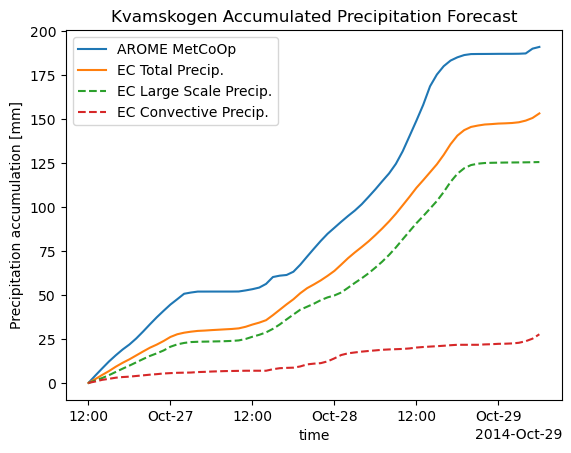

In [9]:
pp_acc_point_arome.plot(x='time', linestyle = '-', label = 'AROME MetCoOp')
tp_acc_point_ecifs.plot(x='time', linestyle = '-', label = 'EC Total Precip.')
lsp_acc_point_ecifs.plot(x='time', linestyle = '--', label = 'EC Large Scale Precip.')
con_acc_point_ecifs.plot(x='time', linestyle = '--', label = 'EC Convective Precip.')

# Plot legend
plt.legend()
# title
plt.title("Kvamskogen Accumulated Precipitation Forecast")
plt.ylabel('Precipitation accumulation [mm]')

## Plot the two accumulated precipitation forecasts on a map

1. Zoom into the west coast system. Plot as maps and point forecasts (e.g. for Flåm) What are the differences between the models, and what might be a major reason for the differences in the precipitation maps?



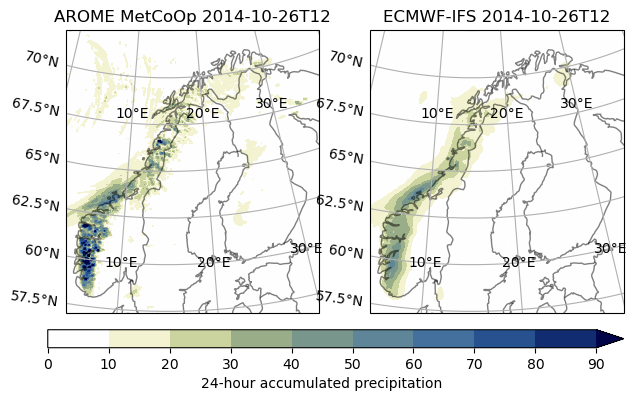

In [10]:
timestep=24 # 24-hour accumulated precipitation (every timestep move +1h ahead, so for the 24-hour accumulated precipitation, you will need 24 timesteps, so you're working with timestep 24)
levelsPP = range(0,100,10)


projection = cy.crs.LambertConformal(central_longitude =arome.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =arome.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = arome.projection_lambert.standard_parallel)
f, axsm = plt.subplots(1,2, subplot_kw={'projection' : projection}, figsize=(7.2,7.2), sharex=True, sharey=True)

for ax in axsm.flatten():
    ax.set_extent([5, 30, 57, 72], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    
arome.precipitation_amount_acc.isel(time=timestep,height0=0).plot.contourf(ax=axsm[0], transform=projection, cmap=cm.davos_r, extend='max',levels=levelsPP,add_colorbar=False)
axsm[0].set_title('AROME MetCoOp '+np.datetime_as_string(arome.time[0],unit='h'))

cf = (ecifs.TP.isel(time=timestep)*1000).plot.contourf(ax=axsm[1], transform=cy.crs.PlateCarree(), cmap=cm.davos_r, extend='max', levels=levelsPP, add_colorbar=False)
axsm[1].set_title ('ECMWF-IFS '+np.datetime_as_string(ecifs.time[0],unit='h'))

cbaxes = f.add_axes([0.1, 0.25, 0.8, 0.025])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='horizontal', extend='max',label='24-hour accumulated precipitation')
  

2. Zoom into the west coast system. Plot as maps and point forecasts (e.g. for Flåm) What are the differences between the models, and what might be a major reason for the differences in the precipitation maps?

Flåm station information from [seklima.met.no](https://seklima.met.no/stations/):

Municipality: Aurland

County: Vestland

Station number (id): SN53280

Height above mean sea level: 15 m

Latitude: 60.861º N

Longitude: 7.1048º E

Operating period: 11.06.2013 - now

WIGOS number: 0-578-0-53280

Station holder: Statens Vegvesen


/tmp/ipykernel_24046/2029388519.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/tmp/ipykernel_24046/2029388519.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)


60.85884915703827
7.091471930071294


Text(0, 0.5, 'Precipitation accumulation [mm]')

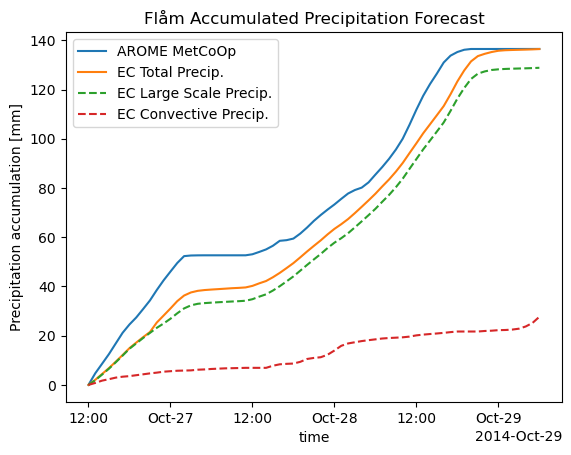

In [11]:
# select nearest grid point to station data
lat_F=60.861; lon_F=7.1048 # Flåm in Western Norway

[yloc_F,xloc_F] = findindex(arome.latitude,arome.longitude,lat_F,lon_F) # from regional model AROME MetCoOp

print(float(arome.latitude[yloc_F,xloc_F]))
print(float(arome.longitude[yloc_F,xloc_F]))


pp_acc_point_arome_F = arome.precipitation_amount_acc.isel(height0 = 0, y = yloc_F, x = xloc_F)

# precipitation in mm
tp_acc_point_ecifs_F  = ecifs.TP.sel(lat=lat_F, lon=lon_F, method='nearest')*1000    # ecifs.TP.attrs['units']
lsp_acc_point_ecifs_F = ecifs.LSP.sel(lat=lat_F, lon=lon_F, method='nearest')*1000   # ecifs.LSP.attrs['units']
con_acc_point_ecifs_F = tp_acc_point_ecifs - lsp_acc_point_ecifs

# plot point forecast
pp_acc_point_arome_F.plot(x='time', linestyle = '-', label = 'AROME MetCoOp')
tp_acc_point_ecifs_F.plot(x='time', linestyle = '-', label = 'EC Total Precip.')
lsp_acc_point_ecifs_F.plot(x='time', linestyle = '--', label = 'EC Large Scale Precip.')
con_acc_point_ecifs_F.plot(x='time', linestyle = '--', label = 'EC Convective Precip.')

# Plot legend
plt.legend()
# title
plt.title("Flåm Accumulated Precipitation Forecast")
plt.ylabel('Precipitation accumulation [mm]')

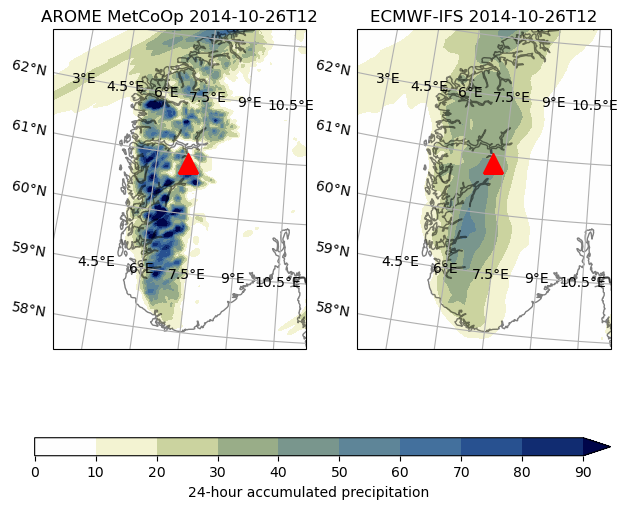

In [12]:
timestep=24 # 24-hour accumulated precipitation
levelsPP = range(0,100,10)


projection = cy.crs.LambertConformal(central_longitude =arome.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =arome.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = arome.projection_lambert.standard_parallel)
f, axsm = plt.subplots(1,2, subplot_kw={'projection' : projection}, figsize=(7.2,7.2), sharex=True, sharey=True)

for ax in axsm.flatten():
    ax.set_extent([lon-2.5, lon+5, lat-2.5, lat+2.5], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    ax.plot(lon_F, lat_F, color='red', marker='^', transform=cy.crs.PlateCarree(), markersize=15)
    
arome.precipitation_amount_acc.isel(time=timestep,height0=0).plot.contourf(ax=axsm[0], transform=projection, cmap=cm.davos_r, extend='max',levels=levelsPP,add_colorbar=False)
axsm[0].set_title('AROME MetCoOp '+np.datetime_as_string(arome.time[0],unit='h'))

cf = (ecifs.TP.isel(time=timestep)*1000).plot.contourf(ax=axsm[1], transform=cy.crs.PlateCarree(), cmap=cm.davos_r, extend='max', levels=levelsPP, add_colorbar=False)
axsm[1].set_title ('ECMWF-IFS '+np.datetime_as_string(ecifs.time[0],unit='h'))

cbaxes = f.add_axes([0.1, 0.125, 0.8, 0.025])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='horizontal', extend='max',label='24-hour accumulated precipitation')



Arome MetCoOp is a convective permitting system with a horizontal resolution of 2.5 km, while ECMWF has a resolution of 10 km. We can see that AROME MetCoOp is much more able to resolve small scale convection and the associated precipitation to it.

AROME

* is more accurate for smaller scales
* exists of a convective permitting microphysical scheme
* orographic precipitation gets represented

ECMWF

* shows the weather situation on a larger scale
* precipitation mostly consists of stratiform precipitation
* less precipitation than in AROME MetCoOp
* convective precipitation is parametrized

3. Plot also temperature and winds of the two model forecasting systems. Compare, interpret, and describe your findings.



In [13]:
# calculate wind direction and speed from x and y
def calc_wind_dir_speed(xwind, ywind):
  
  # wind direction
  wind_dir  = np.arctan2(ywind , xwind)    # wind is now in Pi
  wind_dir  = (270 - np.rad2deg(wind_dir ))     # wind is now in deg
  # adjust if values larger 360
  _larger360 = np.where(wind_dir[:,] > 360.)
  _larger360 = np.array(_larger360).flatten()
  wind_dir[_larger360] = wind_dir[_larger360] - 360.


  # wind speed
  wind_speed = np.sqrt(xwind**2 + ywind**2)

  return(wind_dir, wind_speed)

In [14]:
def plt_point_temperature_wind(axsm, arome, ecifs, xloc_F, yloc_F, lon_F, lat_F):
  
  """Description function"""
  axs = axsm.flatten()

  
  # 2-m temperature
  (arome.air_temperature_2m.isel(height1 = 0, y = yloc_F, x = xloc_F)-273.15).plot(ax = axs[0], color = 'teal', label = 'AROME')
  (ecifs.T2M.sel(lon = lon_F, lat = lat_F, method = 'nearest')-273.15).plot(ax = axs[0], color ='k', linestyle = '--', label = 'ECMWF IFS')
  axs[0].set_ylabel(arome.air_temperature_2m.attrs['long_name'])
  axs[0].legend(loc = 'upper right')

  # calculate wind direction and wind speed
  arome_wind_dir, arome_wind_speed = calc_wind_dir_speed(arome.x_wind_10m.isel(height2 = 0, y = yloc_F, x = xloc_F), arome.y_wind_10m.isel(height2 = 0, y = yloc_F, x = xloc_F))
  ecifs_wind_dir, ecifs_wind_speed = calc_wind_dir_speed(ecifs.U10M.sel(lon = lon_F, lat = lat_F, method = 'nearest'), ecifs.V10M.sel(lon = lon_F, lat = lat_F, method = 'nearest'))

  # 10-m wind direction
  arome_wind_dir.plot(ax = axs[1], color = 'teal',)
  ecifs_wind_dir.plot(ax = axs[1], color = 'k', linestyle = '--')
  axs[1].set_ylabel('10-m Wind direction [$^{o}$]')
  axs[1].set_ylim([0, 360])
  axs[1].axhline(y=90, xmin=0, xmax=100, c="grey", linestyle = ':', linewidth=2, zorder=0)
  axs[1].axhline(y=180, xmin=0, xmax=100, c="grey", linestyle = ':', linewidth=2, zorder=0)
  axs[1].axhline(y=270, xmin=0, xmax=100, c="grey", linestyle = ':', linewidth=2, zorder=0)

  # 10-m wind speed
  arome_wind_speed.plot(ax = axs[2], color = 'teal')
  ecifs_wind_speed.plot(ax = axs[2], color = 'k', linestyle = '--')
  axs[2].set_ylabel('10-m Wind speed [m s$^{-1}$]')

  plt.tight_layout()

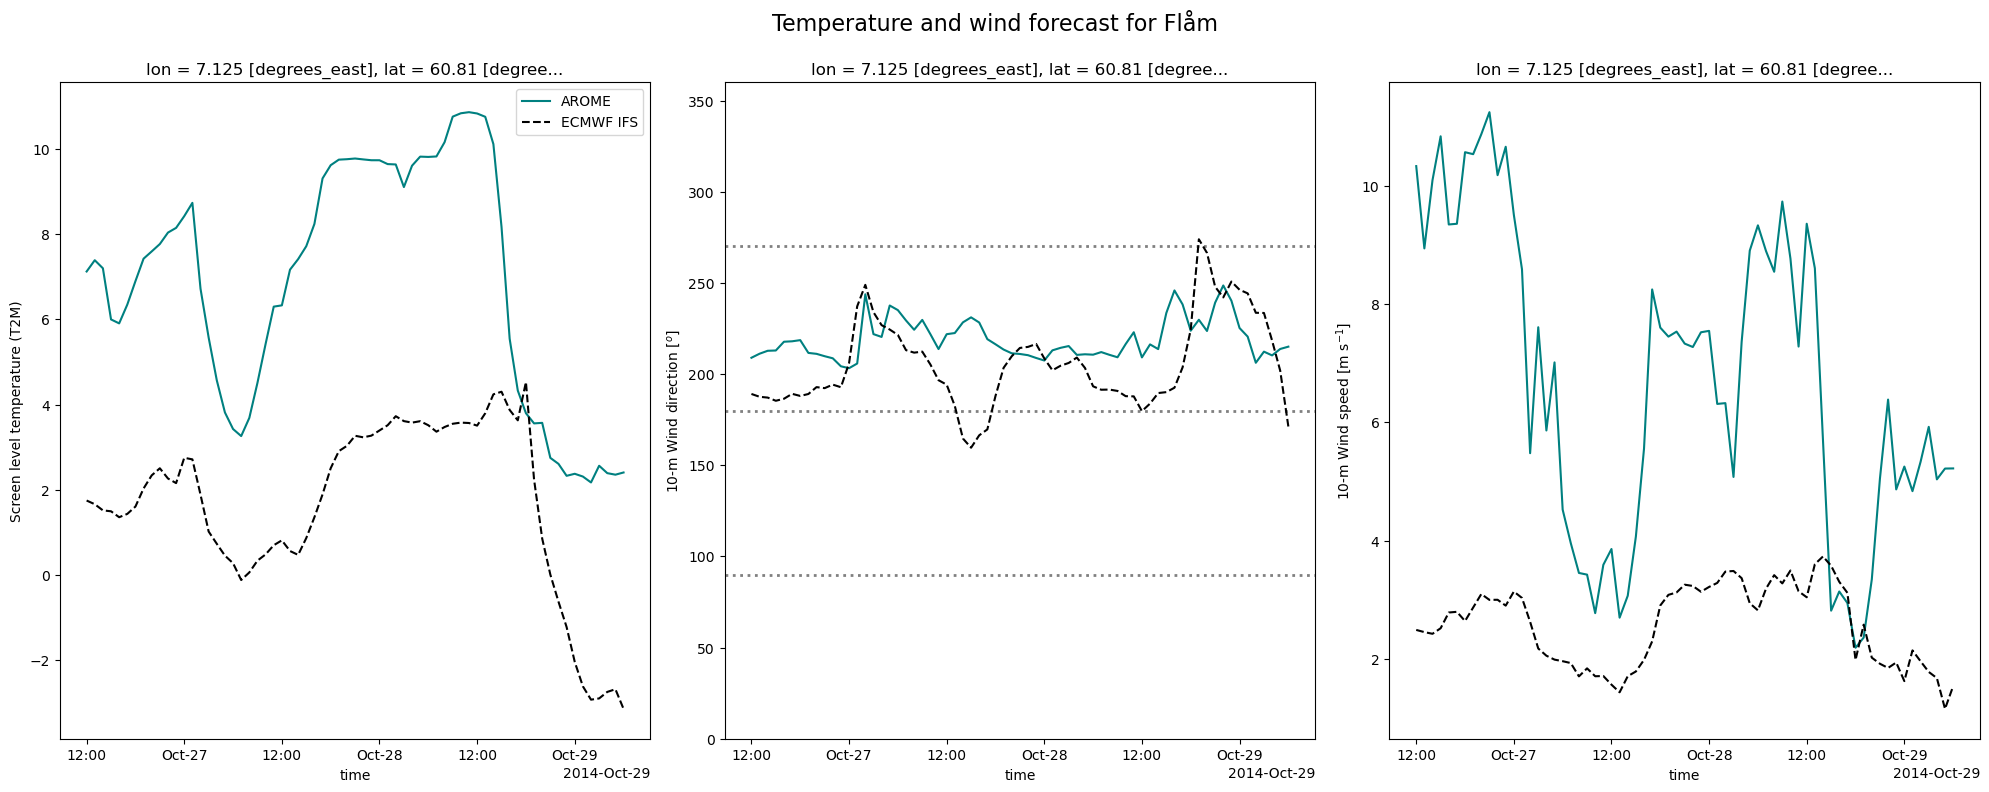

In [15]:
# Plot the point forecast
fig, axsm = plt.subplots(1,3, 
                         figsize=[20,7.5], #sharex=True
                         )

plt_point_temperature_wind(axsm,arome, ecifs, xloc_F, yloc_F, lon_F, lat_F)
fig.suptitle('Temperature and wind forecast for Flåm', fontsize=16, y = 1.05);


AROME

* higher temperatures than EC
* higher wind speeds than EC
* local temperture variations

ECMWF

* coarser horizontal resolution leads to less accurate forecast and is more representative for larger area



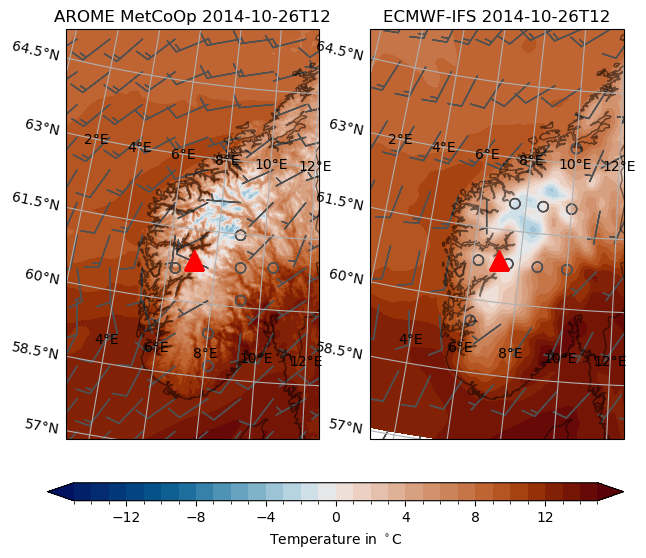

In [16]:
levelsT = np.arange(-15,16)

projection = cy.crs.LambertConformal(central_longitude =arome.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =arome.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = arome.projection_lambert.standard_parallel)
f, axsm = plt.subplots(1,2, subplot_kw={'projection' : projection}, figsize=(7.2,7.2), sharex=True, sharey=True)

for ax in axsm.flatten():
    ax.set_extent([lon-3, lon+6, lat-3, lat+5], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    ax.plot(lon_F, lat_F, color='red', marker='^', transform=cy.crs.PlateCarree(), markersize=15)
    
(arome.air_temperature_2m.isel(time = timestep, height1 = 0)-273.15).plot.contourf(ax=axsm[0], transform=projection, cmap=cm.vik, extend='both',levels=levelsT, add_colorbar=False)
# Plot wind barbs
XX, YY = np.meshgrid(arome.x, arome.y)
axsm[0].barbs(XX[::30, ::30], YY[::30, ::30], arome.x_wind_10m.isel(time = timestep, height2 = 0)[::30,::30], arome.y_wind_10m.isel(time = timestep, height2 = 0)[::30,::30], transform=projection, barbcolor=[0.31372549, 0.31372549, 0.31764706])

axsm[0].set_title('AROME MetCoOp '+np.datetime_as_string(arome.time[0],unit='h'))

cf = (ecifs.T2M.isel(time=timestep)-273.15).plot.contourf(ax=axsm[1], transform=cy.crs.PlateCarree(), cmap=cm.vik, extend='both', levels=levelsT, add_colorbar=False)
# Plot wind barbs
XX_ec, YY_ec = np.meshgrid(ecifs.lon, ecifs.lat)
axsm[1].barbs(XX_ec[::10, ::10], YY_ec[::10, ::10], ecifs.U10M.isel(time = timestep)[::10,::10].values, ecifs.V10M.isel(time = timestep)[::10,::10].values, transform=cy.crs.PlateCarree(), barbcolor=[0.31372549, 0.31372549, 0.31764706])

axsm[1].set_title ('ECMWF-IFS '+np.datetime_as_string(ecifs.time[0],unit='h'))

cbaxes = f.add_axes([0.1, 0.125, 0.8, 0.025])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='horizontal', extend='max',label='Temperature in $^\circ$C')




You shall also access the forecasts of the Polar Low from February 4, 2020 from the global ECMWF system:

* Modify the code, so that the files for February 04 are read in. Compare the forecasts of the two forecasting systems as maps and point-forecasts. What are the main differences and what could be the cause for it?



In [17]:
# Read in AROME Arctic
year = '2020'; month = '02'; day = '04'; HH = '00'
url = 'https://thredds.met.no/thredds/dodsC/aromearcticarchive/{:}/{:}/{:}/arome_arctic_full_2_5km_{:}{:}{:}T{:}Z.nc'.format(year, month, day, year, month, day, HH)
arome_PL = xr.open_dataset(url)
print(arome_PL.data_vars)

# Read in ECMWF
url = 'https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/Arctic.ECMWF_extracted_{:}{:}{:}T{:}Z.nc'.format(year, month, day, HH)
ecif_PL = xr.open_dataset(url)

Data variables:
    forecast_reference_time                                                      datetime64[ns] 8B ...
    p0                                                                           float64 8B ...
    ap                                                                           (hybrid) float64 520B ...
    b                                                                            (hybrid) float64 520B ...
    projection_lambert                                                           int32 4B ...
    liquid_water_content_of_surface_snow                                         (time, height0, y, x) float32 188MB ...
    air_temperature_0m                                                           (time, height0, y, x) float32 188MB ...
    land_area_fraction                                                           (time, height0, y, x) float64 376MB ...
    surface_aerosol_sea                                                          (time, height0, y, x) float32 188

Tromsø station information from [seklima.met.no](https://seklima.met.no/stations/):

Municipality: Tromsø

County: Troms Og Finnmark

Station number (id): SN90450

Height above mean sea level: 100 m

Latitude: 69.6537º N

Longitude: 18.9368º E

Operating period: 01.08.1895 - now

WMO number: 1026

WIGOS number: 0-20000-0-01026

Station holder: Met.no


/tmp/ipykernel_24046/2029388519.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/tmp/ipykernel_24046/2029388519.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)


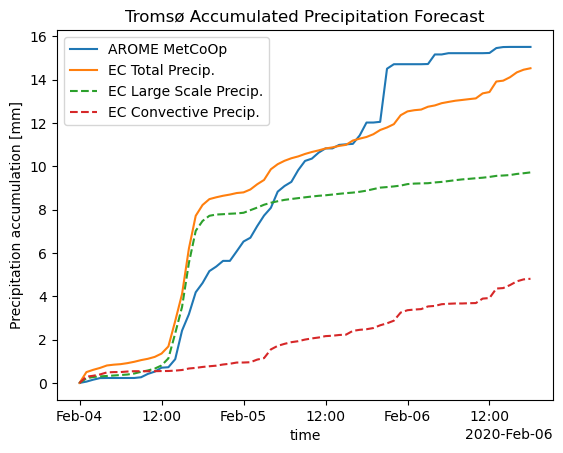

In [18]:
# select nearest grid point to station data
lat_tos=69.6537; lon_tos=18.9368 # Tromsø

[yloc_tos,xloc_tos] = findindex(arome_PL.latitude,arome_PL.longitude,lat_tos,lon_tos) # from regional model arome_PL MetCoOp

pp_acc_point_arome_PL_tos = arome_PL.precipitation_amount_acc.isel(height0 = 0, y = yloc_tos, x = xloc_tos)

# precipitation in mm
tp_acc_point_ecif_PL_tos  = ecif_PL.TP.sel(lat=lat_tos, lon=lon_tos, method='nearest')*1000    # ecif_PL.TP.attrs['units']
lsp_acc_point_ecif_PL_tos = ecif_PL.LSP.sel(lat=lat_tos, lon=lon_tos, method='nearest')*1000   # ecif_PL.LSP.attrs['units']
con_acc_point_ecif_PL_tos = tp_acc_point_ecif_PL_tos - lsp_acc_point_ecif_PL_tos

# plot point forecast

pp_acc_point_arome_PL_tos.plot(x='time', linestyle = '-', label = 'AROME MetCoOp')
tp_acc_point_ecif_PL_tos.plot(x='time', linestyle = '-', label = 'EC Total Precip.')
lsp_acc_point_ecif_PL_tos.plot(x='time', linestyle = '--', label = 'EC Large Scale Precip.')
con_acc_point_ecif_PL_tos.plot(x='time', linestyle = '--', label = 'EC Convective Precip.')

# Plot legend
plt.legend()
# title
plt.title("Tromsø Accumulated Precipitation Forecast")
plt.ylabel('Precipitation accumulation [mm]');

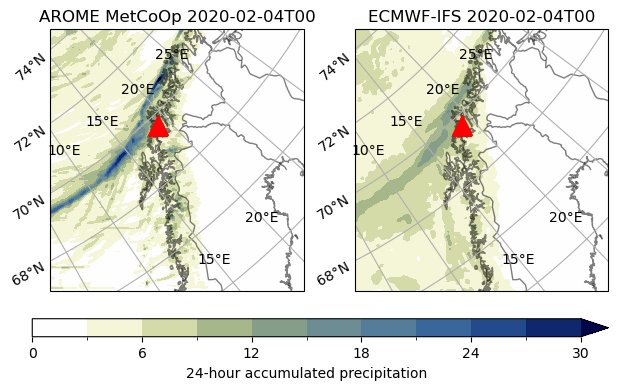

In [19]:
levelsPP = np.arange(0,33,3)
projection = cy.crs.LambertConformal(central_longitude =arome_PL.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =arome_PL.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = arome_PL.projection_lambert.standard_parallel)
f, axsm = plt.subplots(1,2, subplot_kw={'projection' : projection}, figsize=(7.2,7.2), sharex=True, sharey=True)

for ax in axsm.flatten():
    ax.set_extent([lon_tos-7, lon_tos+5, lat_tos-5, lat_tos+3], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    ax.plot(lon_tos, lat_tos, color='red', marker='^', transform=cy.crs.PlateCarree(), markersize=15)
    
arome_PL.precipitation_amount_acc.isel(time=timestep,height0=0).plot.contourf(ax=axsm[0], transform=projection, cmap=cm.davos_r, extend='max',levels=levelsPP,add_colorbar=False)
axsm[0].set_title('AROME MetCoOp '+np.datetime_as_string(arome_PL.time[0],unit='h'))

cf = (ecif_PL.TP.isel(time=timestep)*1000).plot.contourf(ax=axsm[1], transform=cy.crs.PlateCarree(), cmap=cm.davos_r, extend='max', levels=levelsPP, add_colorbar=False)
axsm[1].set_title ('ECMWF-IFS '+np.datetime_as_string(ecif_PL.time[0],unit='h'))

cbaxes = f.add_axes([0.1, 0.25, 0.8, 0.025])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='horizontal', extend='max',label='24-hour accumulated precipitation')



AROME is able to resolve the convective precipiation of the polar low.


In [ ]:
t2m = arome.air_temperature_2m # still in Kelvin
t2m = (t2m -273.15) # no units
#(arome.air_temperature_2m -273.15).attrrs

#t2m = t2m.assign_attrs({'units':'deg C'})
#t2m.attrs

In [ ]:
projection = cy.crs.LambertConformal(central_longitude =arome_PL.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =arome_PL.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = arome_PL.projection_lambert.standard_parallel)

f, axsm = plt.subplots(1,2, subplot_kw={'projection' : projection}, figsize=(7.2,7.2), sharex=True, sharey=True)

for ax in axsm.flatten():
    ax.set_extent([lon_tos-7, lon_tos+5, lat_tos-5, lat_tos+3], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    ax.plot(lon_tos, lat_tos, color='red', marker='^', transform=cy.crs.PlateCarree(), markersize=15)
    
(arome_PL.air_temperature_2m.isel(time = timestep, height1 = 0)-273.15).plot.contourf(ax=axsm[0], transform=projection, cmap=cm.vik, extend='both',levels=levelsT, add_colorbar=False)
# Plot wind barbs
XX, YY = np.meshgrid(arome_PL.x, arome_PL.y)
axsm[0].barbs(XX[::40, ::40], YY[::40, ::40], arome_PL.x_wind_10m.isel(time = timestep, height7 = 0)[::40,::40], arome_PL.y_wind_10m.isel(time = timestep, height7 = 0)[::40,::40], transform=projection, barbcolor=[0.31372549, 0.31372549, 0.31764706])

axsm[0].set_title('AROME MetCoOp '+np.datetime_as_string(arome_PL.time[0],unit='h'))

cf = (ecif_PL.T2M.isel(time=timestep)-273.15).plot.contourf(ax=axsm[1], transform=cy.crs.PlateCarree(), cmap=cm.vik, extend='both', levels=levelsT, add_colorbar=False)
# Plot wind barbs
XX_ec, YY_ec = np.meshgrid(ecif_PL.lon, ecif_PL.lat)
axsm[1].barbs(XX_ec[::20, ::20], YY_ec[::20, ::20], ecif_PL.U10M.isel(time = timestep)[::20,::20].values, ecif_PL.V10M.isel(time = timestep)[::20,::20].values, transform=cy.crs.PlateCarree(), barbcolor=[0.31372549, 0.31372549, 0.31764706])

axsm[1].set_title ('ECMWF-IFS '+np.datetime_as_string(ecif_PL.time[0],unit='h'))

cbaxes = f.add_axes([0.1, 0.25, 0.8, 0.025])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='horizontal', extend='max',label='Temperature in $^\circ$C')


